In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import LinearRegressionMultipleVariables as lr

In [2]:
df = pd.read_csv("C:\\Users\\pedro\\OneDrive\\Documentos\\CEFETMG\\2023.2\\Inteligência Computacional\\CI-Algorithms\\Linear Regression\\Multiple Variables\\data2.txt", sep=",")
df.head()

,Tamanho,Quartos,Preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


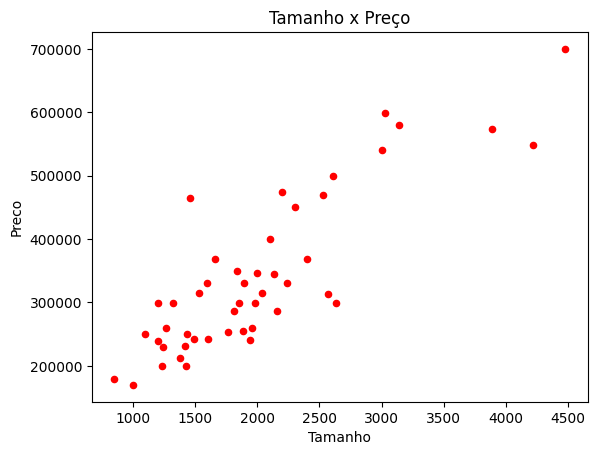

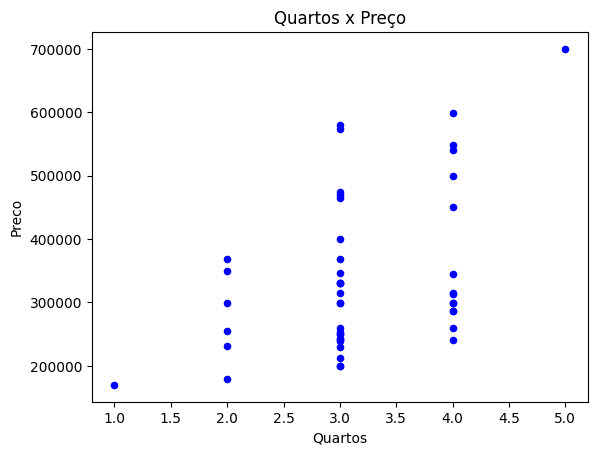

In [3]:
# Comparing each feature with the output value separately
df.plot(kind='scatter', x='Tamanho', y='Preco', c='Red', title='Tamanho x Preço')
df.plot(kind='scatter', x='Quartos', y='Preco', c='Blue', title='Quartos x Preço')
plt.show()

In [4]:
# Feature Normalization

# Subtracting the mean in the first feature (x1)
x1_mean = df['Tamanho'].mean()
new_x1_column = df['Tamanho'].copy()

for i in range (len(new_x1_column)):
    new_x1_column[i] = new_x1_column[i] - x1_mean

df['Tamanho'] = new_x1_column

# Subtracting the mean in the second feature (x2)
x2_mean = df['Quartos'].mean()
new_x2_column = df['Quartos'].copy()

for i in range (len(new_x2_column)):
    new_x2_column[i] = new_x2_column[i] - x2_mean

df['Quartos'] = new_x2_column

# Subtracting the mean in the output (y)
y_mean = df['Preco'].mean()
new_y_column = df['Preco'].copy()

for i in range (len(new_y_column)):
    new_y_column[i] = new_y_column[i] - y_mean

df['Preco'] = new_y_column

df.head()

,Tamanho,Quartos,Preco
0,103.319149,-0.170213,59487.340426
1,-400.680851,-0.170213,-10512.659574
2,399.319149,-0.170213,28587.340426
3,-584.680851,-1.170213,-108412.659574
4,999.319149,0.829787,199487.340426


In [5]:
# Dividing first feature values for the standard deviation
x1_std = df['Tamanho'].std()
new_x1_column = df['Tamanho'].copy()

for i in range (len(new_x1_column)):
    new_x1_column[i] = new_x1_column[i] / x1_std

df['Tamanho'] = new_x1_column

# Dividing the second feature values for the standard deviation
x2_std = df['Quartos'].std()
new_x2_column = df['Quartos'].copy()

for i in range (len(new_x2_column)):
    new_x2_column[i] = new_x2_column[i] / x2_std

df['Quartos'] = new_x2_column

# Dividing the output values for the standard deviation
y_std = df['Preco'].std()
new_y_column = df['Preco'].copy()

for i in range (len(new_y_column)):
    new_y_column[i] = new_y_column[i] / y_std

df['Preco'] = new_y_column

df.head()

,Tamanho,Quartos,Preco
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


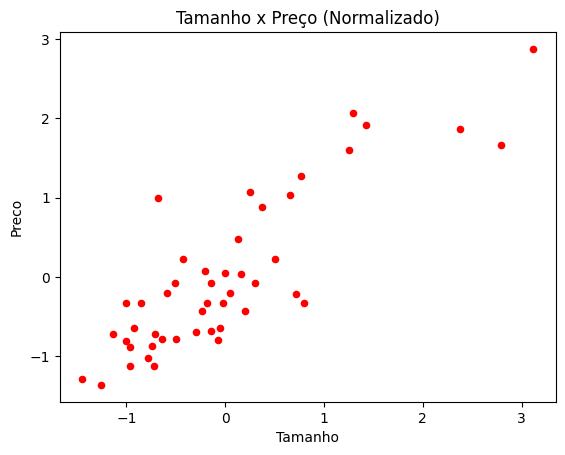

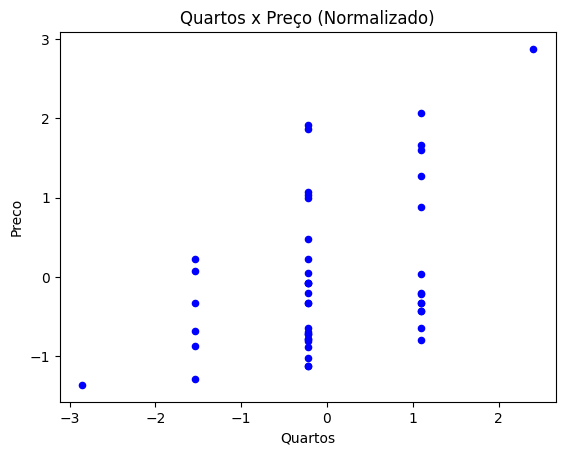

In [6]:
# Plotting features X output after normalization
df.plot(kind='scatter', x='Tamanho', y='Preco', c='Red', title='Tamanho x Preço (Normalizado)')
df.plot(kind='scatter', x='Quartos', y='Preco', c='Blue', title='Quartos x Preço (Normalizado)')
plt.show()

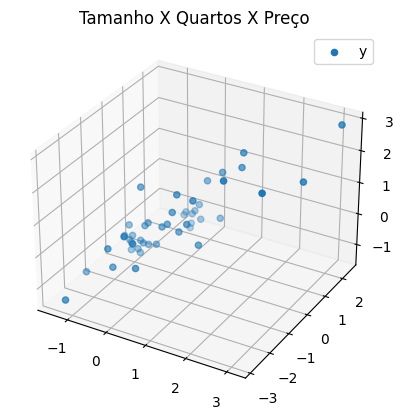

In [7]:
x1 = list(df['Tamanho'])
x2 = list(df['Quartos'])
y = list(df['Preco'])

# Plotting features X output in 3D after normalization
ax = plt.axes(projection = '3d')
ax.scatter(x1, x2, y, label = 'y')
ax.set_title('Tamanho X Quartos X Preço')
ax.legend()
plt.show()


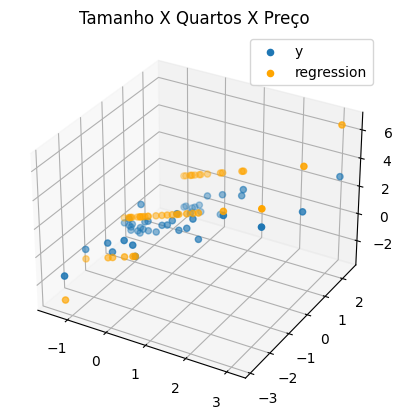

In [8]:
LinearRegression = []

# Defining b0 anda b1 initial values
initial_b0 = 1
initial_b1 = 1
initial_b2 = 1
b0 = initial_b0
b1 = initial_b1
b2 = initial_b2

# Generating First Linear Regression Prediction
for i in range (len(x1)):
    LinearRegression.append(lr.prediction(b0, b1, b2, x1[i], x2[i]))

# Plotting First Linear Regression Prediction
ax = plt.axes(projection = '3d')
ax.scatter(x1, x2, y, label = 'y')
ax.scatter(x1, x2, LinearRegression, label = 'regression', color = 'orange')
ax.set_title('Tamanho X Quartos X Preço')
ax.legend()
plt.show()


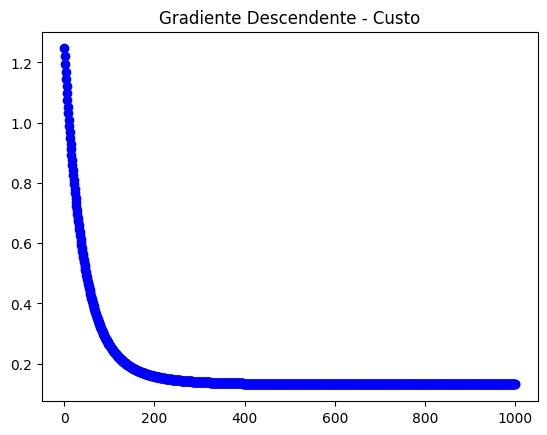

In [9]:
# Gradient Descent

CostValues = []
alpha = 0.01
epoch = 0

# Initializing b0, b1, b2
b0 = initial_b0
b1 = initial_b1
b2 = initial_b2

# Running the model for 1000 epochs
while epoch <= 1000:

    PredictionValues = []

    # Predict with the Linear Regression Model
    for i in range (len(x1)):
        PredictionValues.append(lr.prediction(b0, b1, b2, x1[i], x2[i]))
        
    # Calculate the cost of the prediction
    c = lr.cost(b0, b1, b2, x1, x2, y)
    CostValues.append(c)

    # Calculate b0, b1, b2 adjustments values
    b0_adjust = lr.adjust_b0(b0, b1, b2, x1, x2, y)
    b1_adjust = lr.adjust_b1(b0, b1, b2, x1, x2, y)
    b2_adjust = lr.adjust_b2(b0, b1, b2, x1, x2, y)

    # Update b0, b1, b2 values
    temp_b0 = b0 - alpha * b0_adjust
    temp_b1 = b1 - alpha * b1_adjust
    temp_b2 = b2 - alpha * b2_adjust
    b0 = temp_b0
    b1 = temp_b1
    b2 = temp_b2

    # Incrementing the epoch
    epoch = epoch + 1

# Plotting Cost
x_cost = range(0,1001)
t = list(x_cost)
plt.scatter(t, CostValues, color = 'Blue')
plt.title('Gradiente Descendente - Custo')
plt.show()

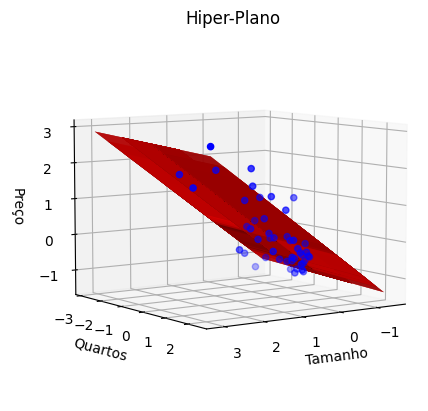

In [10]:
# Plotting Hiper-Plane generated by Linear Regression

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Adjusting Plot angles
ax.view_init(elev=7, azim=55)

# Plotting real data and regression values
ax.scatter(x1, x2, y, label = 'Dados Reais', color = 'blue')

# Plotting Linear Regression Hiper-Plane
xx, yy = np.meshgrid(x1, x2)
zz = b0 + b1 * xx + b2 * yy
ax.plot_surface(xx, yy, zz, alpha = 0.5, label = 'regression', color = 'red')

# Axes Labels
ax.set_xlabel('Tamanho')
ax.set_ylabel('Quartos')
ax.set_zlabel('Preço')
ax.set_title('Hiper-Plano')

# Show the plot
plt.show()

In [11]:
df.head()

,Tamanho,Quartos,Preco
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [12]:
# Normal Equation

# Creating x0 list of values
x0 = np.ones(len(x1), dtype=int)

# Creating a DataFrame only with the features
d = {'x0':x0, 'x1':x1, 'x2':x2}
dfx = pd.DataFrame(d)
dfx.head()

,x0,x1,x2
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [13]:
# Creating X matrix
X = dfx.to_numpy()
print(np.shape(X))
print(X)

(47, 3)
[[ 1.00000000e+00  1.30009869e-01 -2.23675187e-01]
 [ 1.00000000e+00 -5.04189838e-01 -2.23675187e-01]
 [ 1.00000000e+00  5.02476364e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.35723065e-01 -1.53776691e+00]
 [ 1.00000000e+00  1.25747602e+00  1.09041654e+00]
 [ 1.00000000e+00 -1.97317285e-02  1.09041654e+00]
 [ 1.00000000e+00 -5.87239800e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.21881404e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.81023044e-01 -2.23675187e-01]
 [ 1.00000000e+00 -6.37573110e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.63567023e-02  1.09041654e+00]
 [ 1.00000000e+00 -8.56737193e-04 -2.23675187e-01]
 [ 1.00000000e+00 -1.39273340e-01 -2.23675187e-01]
 [ 1.00000000e+00  3.11729182e+00  2.40450826e+00]
 [ 1.00000000e+00 -9.21956312e-01 -2.23675187e-01]
 [ 1.00000000e+00  3.76643089e-01  1.09041654e+00]
 [ 1.00000000e+00 -8.56523009e-01 -1.53776691e+00]
 [ 1.00000000e+00 -9.62222960e-01 -2.23675187e-01]
 [ 1.00000000e+00  7.65467909e-01  1.09041654e+00]
 [ 1.00000000e+00  1.29

In [14]:
# Calculating X Transpose
X_t = np.transpose(X)
print(np.shape(X_t))
print(X_t)

(3, 47)
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 1.30009869e-01 -5.04189838e-01  5.02476364e-01 -7.35723065e-01
   1.25747602e+00 -1.97317285e-02 -5.87239800e-01 -7.21881404e-01
  -7.81023044e-01 -6.37573110e-01 -7.63567023e-02 -8.56737193e-04
  -1.39273340e-01

In [15]:
# Calculating X_t * X
X_temp = np.matmul(X_t, X)
print(np.shape(X_temp))
print(X_temp)

(3, 3)
[[4.70000000e+01 8.88178420e-16 1.02140518e-14]
 [8.88178420e-16 4.60000000e+01 2.57584914e+01]
 [1.02140518e-14 2.57584914e+01 4.60000000e+01]]


In [16]:
# Calculating the inverse of X_temp
X_temp_inv = np.linalg.inv(X_temp)
print(np.shape(X_temp_inv))
print(X_temp_inv)

(3, 3)
[[ 2.12765957e-02  3.25546329e-18 -6.54730598e-18]
 [ 3.25546329e-18  3.16695326e-02 -1.77338997e-02]
 [-6.54730598e-18 -1.77338997e-02  3.16695326e-02]]


In [17]:
# Calculating X_temp_inv * X_t
X_final = np.dot(X_temp_inv, X_t)
print(np.shape(X_final))
print(X_final)

(3, 47)
[[ 0.0212766   0.0212766   0.0212766   0.0212766   0.0212766   0.0212766
   0.0212766   0.0212766   0.0212766   0.0212766   0.0212766   0.0212766
   0.0212766   0.0212766   0.0212766   0.0212766   0.0212766   0.0212766
   0.0212766   0.0212766   0.0212766   0.0212766   0.0212766   0.0212766
   0.0212766   0.0212766   0.0212766   0.0212766   0.0212766   0.0212766
   0.0212766   0.0212766   0.0212766   0.0212766   0.0212766   0.0212766
   0.0212766   0.0212766   0.0212766   0.0212766   0.0212766   0.0212766
   0.0212766   0.0212766   0.0212766   0.0212766   0.0212766 ]
 [ 0.00808399 -0.01200082  0.01987982  0.0039706   0.02048634 -0.01996223
  -0.01463098 -0.01889501 -0.020768   -0.01622501 -0.02175552  0.0039395
  -0.00044409  0.05608187 -0.02523129 -0.00740923  0.00014492 -0.02650652
   0.00490467  0.02172172 -0.00534574  0.02278018 -0.01184142 -0.0208788
   0.07925753 -0.03192623 -0.01765964  0.02490103  0.01190966  0.02932447
   0.02082749  0.01069663 -0.01777044  0.04924987 

In [18]:
df.head()

,Tamanho,Quartos,Preco
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [19]:
# Adjusting y vector's dimension
d_temp = {'y':y}
dfy = pd.DataFrame(d_temp)
y_vector = dfy.to_numpy()
print(np.shape(y_vector))

(47, 1)


In [20]:
# Calculating teta vector
teta_vector = np.matmul(X_final, y_vector)
print(np.shape(teta_vector))
print(teta_vector)

(3, 1)
[[-1.11022302e-16]
 [ 8.84765988e-01]
 [-5.31788197e-02]]


In [21]:
# Calculating Linear Regression Result
prediction = teta_vector[0] + teta_vector[1] * xx + teta_vector[2] * yy


[[ 0.12692309 -0.43419524  0.45646878 ... -1.26696609 -0.15363607
  -0.87618726]
 [ 0.12692309 -0.43419524  0.45646878 ... -1.26696609 -0.15363607
  -0.87618726]
 [ 0.12692309 -0.43419524  0.45646878 ... -1.26696609 -0.15363607
  -0.87618726]
 ...
 [ 0.19680494 -0.36431339  0.52635063 ... -1.19708425 -0.08375423
  -0.80630541]
 [ 0.05704125 -0.50407708  0.38658693 ... -1.33684794 -0.22351792
  -0.9460691 ]
 [ 0.12692309 -0.43419524  0.45646878 ... -1.26696609 -0.15363607
  -0.87618726]]


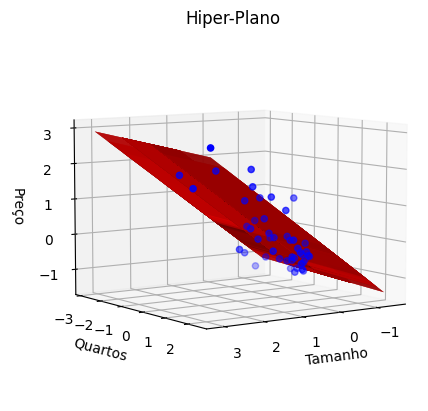

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Adjusting Plot angles
ax.view_init(elev=7, azim=55)

# Plotting real data and regression values
ax.scatter(x1, x2, y, label = 'Dados Reais', color = 'blue')

# Plotting Linear Regression Hiper-Plane
xx, yy = np.meshgrid(x1, x2)
zz = teta_vector[0] + teta_vector[1] * xx + teta_vector[2] * yy
ax.plot_surface(xx, yy, zz, alpha = 0.5, label = 'regression', color = 'red')

# Axes Labels
ax.set_xlabel('Tamanho')
ax.set_ylabel('Quartos')
ax.set_zlabel('Preço')
ax.set_title('Hiper-Plano')

# Show the plot
plt.show()